In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
from scipy.stats import zscore
import warnings
import plotly.graph_objs as go
warnings.filterwarnings("ignore")

# 1. Data Preparation (1)
#### 1-1) Road the Data
#### 1-2) Check the Data Types
#### 1-3) Check the Missing values


In [183]:
NewData = pd.read_csv("/content/drive/Shared drives/Data Science with Python Project Team 4/Customer_Churn_Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
NewData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [184]:
# 1-2) Check the Data types
# Check the data types and found "TotalCharges" type is wrong
#converting TotalCharges to float

NewData['TotalCharges'] = pd.to_numeric(NewData['TotalCharges'], errors='coerce')
print(NewData.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [185]:
# 1-3) Check the missing values
#dropna

NewData.dropna(axis=0,inplace=True)
print(NewData.isnull().sum()) 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [186]:
# Check the data set
print(NewData.shape)
print(NewData.describe())
# We can see from that the numeric variables have different scales. 

(7032, 21)
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


# 2. Visualization(1) - Tables

In [187]:
# 2-1-1) A Frequency table based on number of Customer Churn
tb1 = pd.crosstab([NewData.Churn], 
                  columns='Number',
                  colnames =[' '],
                  margins = False) 
print(tb1)

       Number
Churn        
No       5163
Yes      1869


In [188]:
# 2-1-2) Colored Table 
# cat dataframe -> recode using factorize 
df_cat_plot = NewData.drop(['customerID','tenure','MonthlyCharges','TotalCharges','Churn'],axis=1)
df_cat =df_cat_plot.apply(lambda x : pd.factorize(x)[0])+1
df_cat

df_cont = NewData[['tenure','MonthlyCharges','TotalCharges','Churn']]
df_cont
df_cat = df_cat.merge(df_cont,left_index=True,right_index=True)
df_cat

table1 = df_cat.groupby(['Churn']).mean()
th_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('background-color', '#f7f7f9')
  ]

# CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

table1 = table1.style.background_gradient(cmap='PuBu').set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}]).set_table_styles(styles)
table1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
No,1.507263,1.128995,1.472400,1.343405,1.901220,2.311253,1.893473,1.878172,1.904126,1.907806,1.880108,1.910905,1.915553,1.887081,1.463878,2.497385,37.650010,61.307408,2555.344141
Yes,1.497592,1.254682,1.642055,1.174425,1.909042,2.363831,1.814874,1.278759,1.780631,1.412520,1.286784,1.556447,1.558587,1.140182,1.250936,1.813269,17.979133,74.441332,1531.796094


# Visualization(2) - Plots

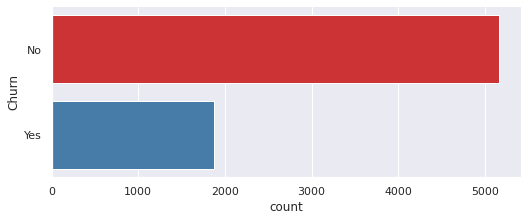

In [189]:
# 2-2-1) Bar chart: Churn
df = sns.catplot(y="Churn", kind = "count", data=NewData, height = 3.0,
                 palette="Set1",
                 aspect = 2.5, orient = 'h')


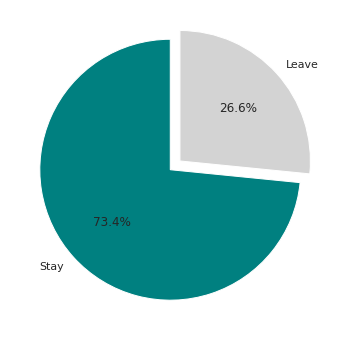

In [190]:
# 2-2-2) Pie chart: Churn
values = NewData.Churn.value_counts()
plt.figure(figsize=(6,6))
plt.pie(values, explode = (0,0.1),autopct='%1.1f%%',labels=['Stay','Leave'], shadow=False,startangle=90,colors=['teal','lightgrey'])
plt.show()

In [191]:
#Creating poly faetures!

y = NewData['Churn']
print(y.shape)
y = pd.DataFrame(y)

#resetting index
y.reset_index(inplace=True,drop=True)

X = NewData.drop('Churn',axis=1)
print(X.shape)


#drop Customer ID
X = X.drop('customerID',axis=1)

#seperating numeric columns

X_num = X[['tenure','MonthlyCharges','TotalCharges']]

(7032,)
(7032, 20)


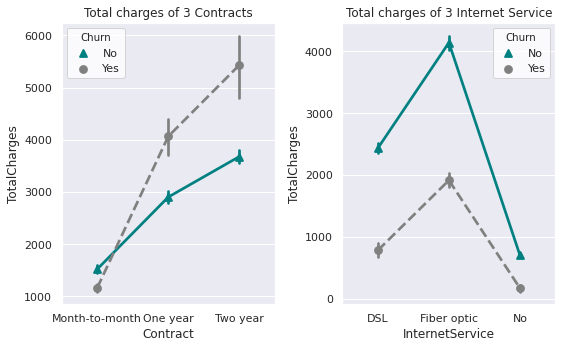

In [192]:
# 2-2-3) Check the relationship between Churn and continous coloumns
fig, axs = plt.subplots(ncols=2,figsize=(8,5))
sns.set(style="whitegrid", color_codes=True)
np.random.seed(2017)

ax1= sns.pointplot(x="Contract", y="TotalCharges", hue="Churn", data=NewData,
palette={"No": "teal", "Yes": "grey"},
markers=["^", "o"], linestyles=["-", "--"],
ax=axs[0])
ax1.set_title("Total charges of 3 Contracts")

ax2=sns.pointplot(x="InternetService", y="TotalCharges", hue="Churn", data=NewData,
              palette={"No": "teal", "Yes": "grey"},
              markers=["^", "o"], linestyles=["-", "--"],ax=axs[1])
ax2.set_title("Total charges of 3 Internet Service")
plt.tight_layout()
plt.show()

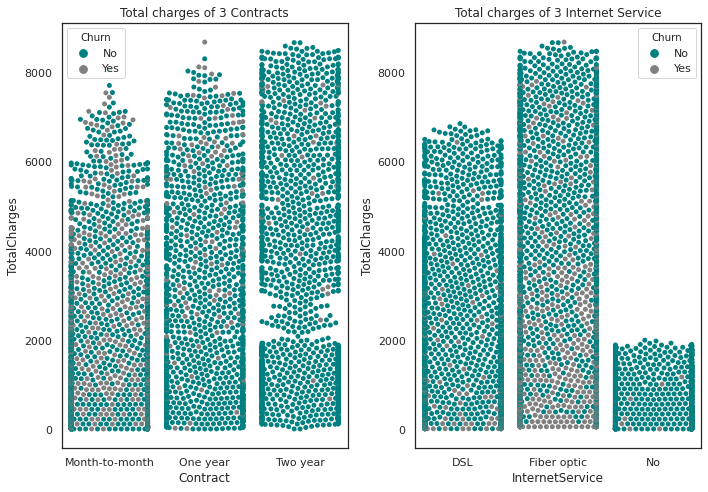

In [193]:
sns.set(style="white", color_codes=True)
fig, axs = plt.subplots(ncols=2,figsize=(10,7))
sns.set(style="whitegrid", color_codes=True)
np.random.seed(2017)
ax1= sns.swarmplot(x="Contract", y="TotalCharges", hue="Churn",palette={"No": "teal", "Yes": "grey"}, data=NewData,ax=axs[0])
ax1.set_title("Total charges of 3 Contracts")
ax2= sns.swarmplot(x="InternetService", y="TotalCharges", hue="Churn", data=NewData,
              palette={"No": "teal", "Yes": "grey"}, ax=axs[1])
ax2.set_title("Total charges of 3 Internet Service")
plt.tight_layout()
plt.show()

   gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       1              1        1  ...           29.85         29.85      0
1       2              1        2  ...           56.95       1889.50      0
2       2              1        2  ...           53.85        108.15      1
3       2              1        2  ...           42.30       1840.75      0
4       1              1        2  ...           70.70        151.65      1

[5 rows x 20 columns]


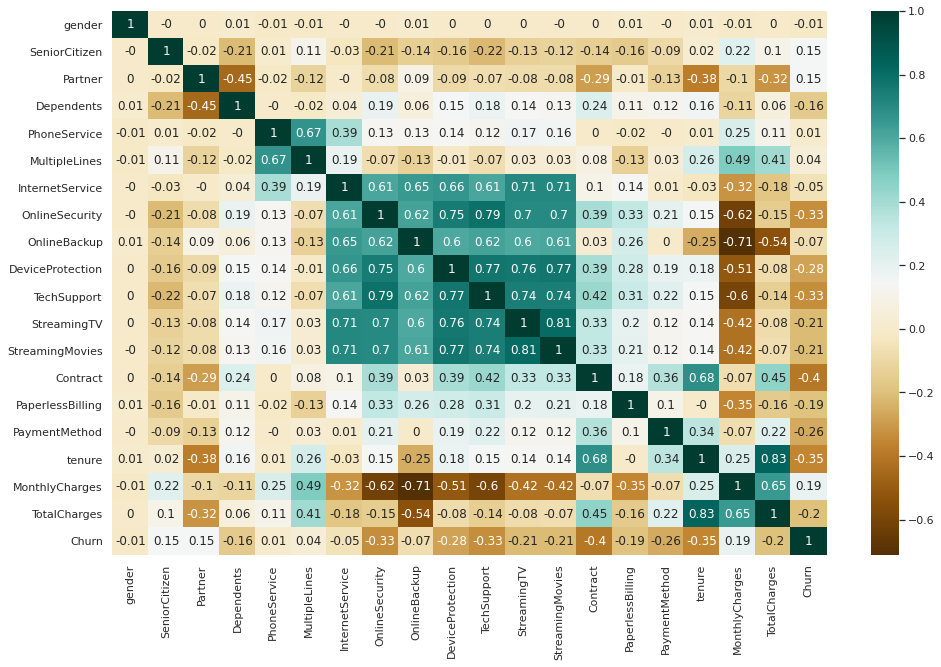

In [194]:
# 2-2-4) Make a heatmap
df_cat['Churn'] = np.where(df_cat['Churn']=='Yes', 1, 0)
print(df_cat.head())
corr = df_cat.corr()
sns.set(rc={'figure.figsize':(16,10)})
correlation_matrix = df_cat.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap='BrBG')

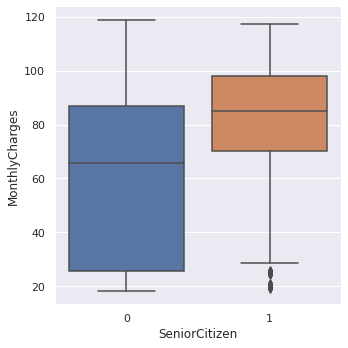

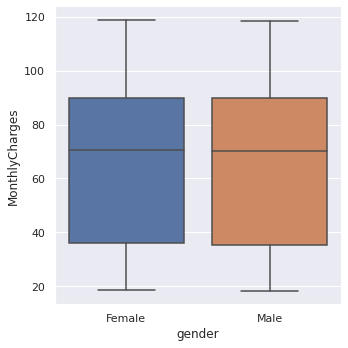

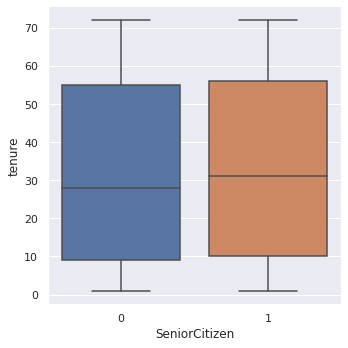

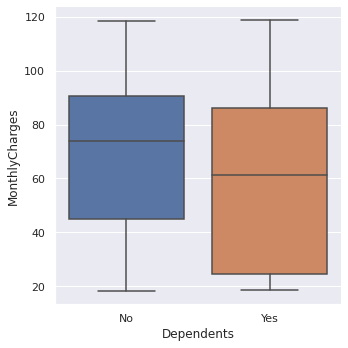

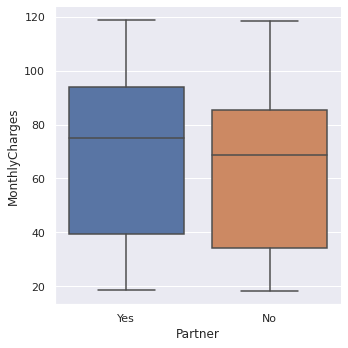

In [195]:
# 2-2-5) Demographic analysis
# Data preparation
df_cat_plot = df_cat_plot.merge(df_cont, right_index=True,left_index=True) #original data without factorize
df_cat_plot['Churn'] = np.where(df_cat_plot['Churn']=='Yes', 1, 0)
df_cat_plot

sns.catplot(x="SeniorCitizen", y="MonthlyCharges", kind="box", data=df_cat_plot);
#Plot tells that the senior citizen tend to have higher montly charges as compared to
#younger population

sns.catplot(x="gender", y="MonthlyCharges", kind="box", data=df_cat_plot);

#male and females largely have same avg monthly bills

sns.catplot(x="SeniorCitizen", y="tenure", kind="box", data=df_cat_plot);

#senior citizen have higher mean tenure as compared to young population
#young people churn often

sns.catplot(x="Dependents", y="MonthlyCharges", kind="box", data=df_cat_plot);

#people with no dependents have higher avg. monthly bills

sns.catplot(x="Partner", y="MonthlyCharges", kind="box", data=df_cat_plot);

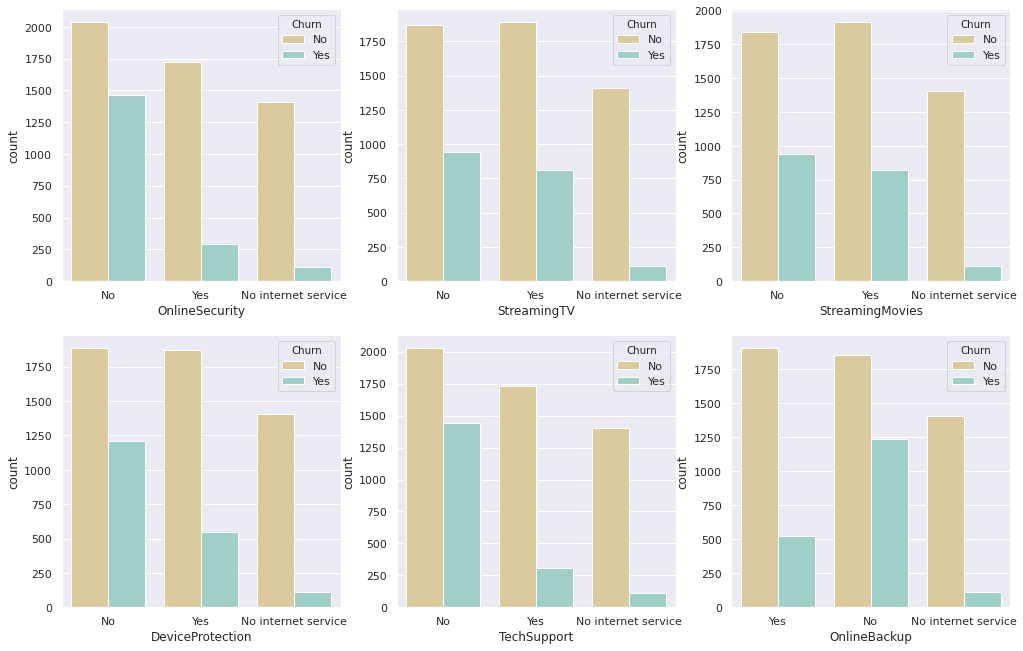

In [196]:
# 2-2-6）Barchart: Count online service related cat. variables for target "Yes" and "No"
# Check the distribution of some categorical variables that indicates high correlation in the heat map
# Oneline BackUp, Online Security, DeviceProtection, Streaming TV, Streaming Movies and Techsupport 
# These columns have the same range of answers 
plt.figure(figsize=(17, 17))

plt.subplot(3, 3, 6)
sns.countplot('OnlineBackup', data=NewData, hue='Churn',palette='BrBG')

plt.subplot(3, 3, 1)
sns.countplot('OnlineSecurity', data=NewData, hue='Churn',palette='BrBG')

plt.subplot(3, 3, 2)
sns.countplot('StreamingTV', data=NewData, hue='Churn',palette='BrBG')

plt.subplot(3, 3, 3)
sns.countplot('StreamingMovies', data=NewData, hue='Churn',palette='BrBG')

plt.subplot(3, 3, 4)
sns.countplot('DeviceProtection', data=NewData, hue='Churn',palette='BrBG')

plt.subplot(3, 3, 5)
plt.tight_layout
sns.countplot('TechSupport', data=NewData, hue='Churn',palette='BrBG')
plt.savefig('/content/drive/Shared drives/Data Science with Python Project Team 4/Plots/hist_internet_related.png')
# So for these conditions, we'd like to keep only one variable.

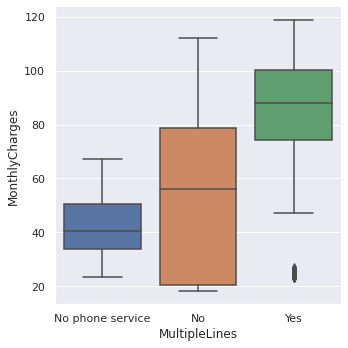

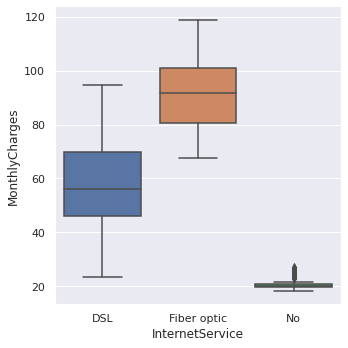

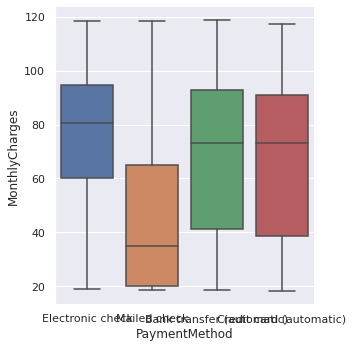

In [197]:
# 2-2-8)Boxplot: Monthly charges for x: Partners, InternetService, PaymentMethod
#People with partners have higher avg. monthly bills

sns.catplot(x="MultipleLines", y="MonthlyCharges", kind="box", data=df_cat_plot);

sns.catplot(x="InternetService", y="MonthlyCharges", kind="box", data=df_cat_plot);

#Fiber optics service has very high monthly charges
sns.catplot(x="PaymentMethod", y="MonthlyCharges", kind="box", data=df_cat_plot);

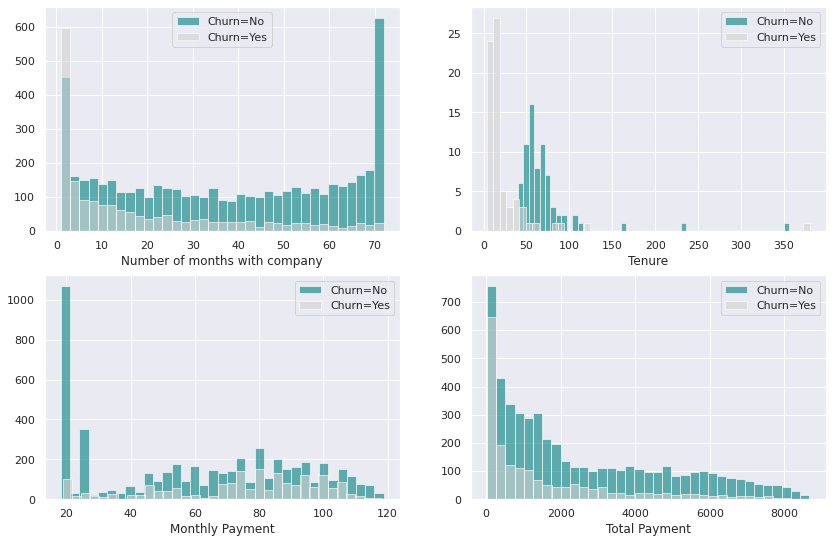

In [198]:
# 2-2-9) Comparison between two kind of customers with time and charges 
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
NewData[NewData.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='Churn=No',color='teal')
NewData[NewData.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Churn=Yes',color='lightgrey')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
NewData[NewData.Churn == 'No'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No',color='teal')
NewData[NewData.Churn == 'Yes'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes',color='lightgrey')
plt.xlabel('Tenure')
plt.legend()

plt.subplot(3, 2, 3)
NewData[NewData.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No',color='teal')
NewData[NewData.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes',color='lightgrey')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
NewData[NewData.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No',color='teal')
NewData[NewData.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes',color='lightgrey')
plt.xlabel('Total Payment')
plt.legend()
plt.savefig('/content/drive/Shared drives/Data Science with Python Project Team 4/Plots/hist3.png')

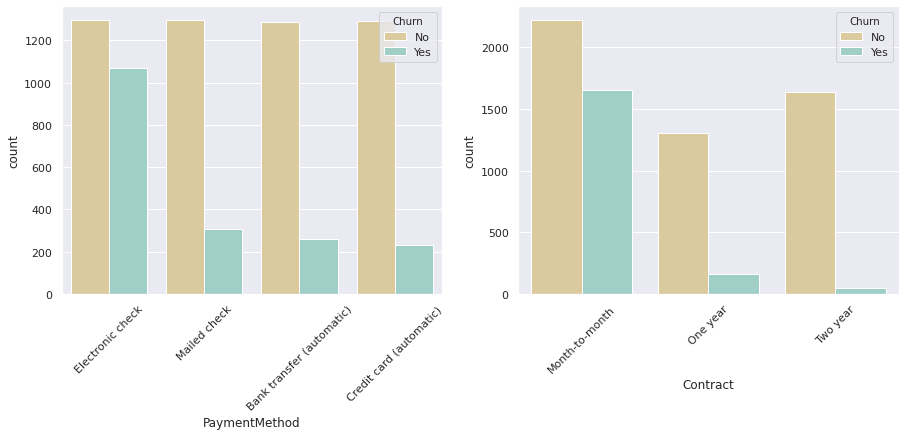

In [199]:
# Barchart: cat. variables (paymentmethod and contract) for target "Yes" and "No"
plt.figure(figsize=(15, 18))
plt.subplot(3, 2, 3)
g = sns.countplot('PaymentMethod', data=NewData, hue='Churn',palette='BrBG')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(3, 2, 4)
g = sns.countplot('Contract', data=NewData, hue='Churn',palette='BrBG')
g.set_xticklabels(g.get_xticklabels(), rotation=45);
plt.savefig('/content/drive/Shared drives/Data Science with Python Project Team 4/Plots/hist_cat.png')

In [0]:
# 2-2-10) Make tenure to categorical column
def tenure_lab(NewData) :
    
    if NewData["tenure"] <= 12 :
        return "1year"
    elif (NewData["tenure"] > 12) & (NewData["tenure"] <= 24 ):
        return "2years"
    elif (NewData["tenure"] > 24) & (NewData["tenure"] <= 48) :
        return "3years"
    elif (NewData["tenure"] > 48) & (NewData["tenure"] <= 60) :
        return "4years"
    elif NewData["tenure"] > 60 :
        return "over5years"
NewData["Tenure_Category"] = NewData.apply(lambda NewData:tenure_lab(NewData),
                                     axis = 1)
    

In [201]:
# cretating polynomial features: Tenure Group vs Total charges 

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X_num)
tmp1 = pd.DataFrame(X_poly)
churn     = NewData[NewData["Churn"] == "Yes"]
not_churn = NewData[NewData["Churn"] == "No"]

NewData1 = NewData.groupby(["Tenure_Category","Churn"])[["MonthlyCharges",
                                                    "TotalCharges"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = NewData1[NewData1["Churn"] == aggregate]["Tenure_Category"],
                    y = NewData1[NewData1["Churn"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Churn"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean monthly charges by tenure groups
trace1  = mean_charges("MonthlyCharges","Yes")
trace2  = mean_charges("MonthlyCharges","No")
layout1 = layout_plot("Average Monthly Charges by Tenure groups",
                      "Tenure group","Monthly Charges")
data1   = [trace1,trace2]
fig1    = go.Figure(data=data1,layout=layout1)

#plot2 - mean total charges by tenure groups
trace3  = mean_charges("TotalCharges","Yes")
trace4  = mean_charges("TotalCharges","No")
layout2 = layout_plot("Average Total Charges by Tenure groups",
                      "Tenure group","Total Charges")
data2   = [trace3,trace4]
fig2    = go.Figure(data=data2,layout=layout2)
fig1.show()
fig2.show()

# 4. Data Preparation (2)
1. Create polynomial features (and interactions).

2. Create log features.

3. Join these two datasets together with the original variables.

In [202]:
#Creating log features

X_log = np.log(X_num)
tmp = pd.DataFrame(X_log)
print(tmp.shape) # same number of columns, but they've changed.
tmp



#resetting index

tmp.reset_index(inplace=True,drop=True)

#renaming columns and adding _log
tmp.columns = [col+'_'+'log' for col in tmp.columns]

(7032, 3)


In [0]:
#interaction term!
new_col = X_num['tenure'] * X_num['MonthlyCharges']
X_num.insert(loc=3, column='tenure*monthlycharges', value=new_col)


In [204]:
#merging X_num, tmp1(poly features) and tmp(log features)

#resetting index of X_num
X_num.reset_index(inplace=True,drop=True)

# smoosh the two dataframes together
X_smoosh = pd.concat([X_num,tmp1, tmp], axis=1)
X_smoosh.shape # look at how many more columns there are

(7032, 42)

In [205]:
X_smoosh  #this is the dataframe which has the original numeric columns from the actual dataset and the log features and polynomial features

,tenure,MonthlyCharges,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
0,1,29.85,29.85,29.85,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,0.000000,3.396185,3.396185
1,34,56.95,1889.50,1936.30,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,1.847061e+05,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13,3.526361,4.042174,7.544068
2,2,53.85,108.15,107.70,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,1.561554e+05,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08,0.693147,3.986202,4.683519
3,45,42.30,1840.75,1903.50,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,7.568697e+04,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13,3.806662,3.744787,7.517928
4,2,70.70,151.65,141.40,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,3.533932e+05,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.465736e+08,5.288952e+08,0.693147,4.258446,5.021575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,2035.20,1.0,24.0,84.80,1990.50,576.0,2035.20,47772.00,7191.0400,168794.4000,3.962090e+06,13824.0,48844.80,1146528.00,172584.9600,4.051066e+06,9.509017e+07,6.098002e+05,1.431377e+07,3.359853e+08,7.886541e+09,331776.0,1172275.20,2.751667e+07,4.142039e+06,9.722557e+07,2.282164e+09,1.463520e+07,3.435304e+08,8.063646e+09,1.892770e+11,5.171106e+07,1.213807e+09,2.849155e+10,6.687786e+11,1.569816e+13,3.178054,4.440296,7.596141
7028,72,103.20,7362.90,7430.40,1.0,72.0,103.20,7362.90,5184.0,7430.40,530128.80,10650.2400,759851.2800,5.421230e+07,373248.0,534988.80,38169273.60,766817.2800,5.470929e+07,3.903285e+09,1.099105e+06,7.841665e+07,5.594709e+09,3.991597e+11,26873856.0,38519193.60,2.748188e+09,5.521084e+07,3.939069e+09,2.810365e+11,7.913554e+07,5.645999e+09,4.028190e+11,2.873950e+13,1.134276e+08,8.092598e+09,5.773740e+11,4.119328e+13,2.938973e+15,4.276666,4.636669,8.904209
7029,11,29.60,346.45,325.60,1.0,11.0,29.60,346.45,121.0,325.60,3810.95,876.1600,10254.9200,1.200276e+05,1331.0,3581.60,41920.45,9637.7600,1.128041e+05,1.320304e+06,2.593434e+04,3.035456e+05,3.552817e+06,4.158356e+07,14641.0,39397.60,4.611249e+05,1.060154e+05,1.240845e+06,1.452334e+07,2.852777e+05,3.339002e+06,3.908099e+07,4.574192e+08,7.676563e+05,8.984951e+06,1.051634e+08,1.230873e+09,1.440663e+10,2.397895,3.387774,5.847739
7030,4,74.40,306.60,297.60,1.0,4.0,74.40,306.60,16.0,297.60,1226.40,5535.3600,22811.0400,9.400356e+04,64.0,1190.40,4905.60,22141.4400,9.124416e+04,3.760142e+05,4.118308e+05,1.697141e+06,6.99386

**Feature Engineering for Categorical Variables**

In [206]:
X_cat = X.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

X_cat.reset_index(drop=True,inplace=True)

X_cat.reset_index(drop=False,inplace=True)

X_cat.head() #This has only categorical variables!


,index,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [0]:
cat_df = X_cat.iloc[:,1:]
columns = cat_df.columns
df_final = pd.DataFrame(X_cat['index'])
for col in columns:
  df = pd.DataFrame(cat_df[col])
  one_hot = pd.get_dummies(cat_df[col])
  df = df.join(one_hot)
  df_final = df_final.merge(df,left_index=True,right_index=True)

In [208]:
df_final

,index,gender,Female,Male,SeniorCitizen,0,1,Partner,No_x,Yes_x,Dependents,No_y,Yes_y,PhoneService,No_x,Yes_x,MultipleLines,No_y,No phone service,Yes_y,InternetService,DSL,Fiber optic,No_x,OnlineSecurity,No_y,No internet service_x,Yes_x,OnlineBackup,No_x,No internet service_y,Yes_y,DeviceProtection,No_y,No internet service_x,Yes_x,TechSupport,No_x,No internet service_y,Yes_y,StreamingTV,No_y,No internet service_x,Yes_x,StreamingMovies,No_x,No internet service_y,Yes_y,Contract,Month-to-month,One year,Two year,PaperlessBilling,No_y,Yes,PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
1,1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1
2,2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1
3,3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0
4,4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7027,Male,0,1,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,Yes,0,0,1,Yes,0,0,1,One year,0,1,0,Yes,0,1,Mailed check,0,0,0,1
7028,7028,Female,1,0,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,Fiber optic,0,1,0,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,One year,0,1,0,Yes,0,1,Credit card (automatic),0,1,0,0
7029,7029,Female,1,0,0,1,0,Yes,0,1,Yes,0,1,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
7030,7030,Male,0,1,1,0,1,Yes,0,1,No,1,0,Yes,0,1,Yes,0,0,1,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1


In [0]:
df_final = df_final.drop('index',axis=1)

In [0]:
#df_final = df_final.iloc[:,1:]

In [211]:
df_final

,gender,Female,Male,SeniorCitizen,0,1,Partner,No_x,Yes_x,Dependents,No_y,Yes_y,PhoneService,No_x,Yes_x,MultipleLines,No_y,No phone service,Yes_y,InternetService,DSL,Fiber optic,No_x,OnlineSecurity,No_y,No internet service_x,Yes_x,OnlineBackup,No_x,No internet service_y,Yes_y,DeviceProtection,No_y,No internet service_x,Yes_x,TechSupport,No_x,No internet service_y,Yes_y,StreamingTV,No_y,No internet service_x,Yes_x,StreamingMovies,No_x,No internet service_y,Yes_y,Contract,Month-to-month,One year,Two year,PaperlessBilling,No_y,Yes,PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,1,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,Yes,0,0,1,Yes,0,0,1,One year,0,1,0,Yes,0,1,Mailed check,0,0,0,1
7028,Female,1,0,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,Fiber optic,0,1,0,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,One year,0,1,0,Yes,0,1,Credit card (automatic),0,1,0,0
7029,Female,1,0,0,1,0,Yes,0,1,Yes,0,1,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
7030,Male,0,1,1,0,1,Yes,0,1,No,1,0,Yes,0,1,Yes,0,0,1,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1


In [0]:
B = ['gender','Female','Male','SeniorCitizen','Not_A_SeniorCitizen','SeniorCitizen','Partner','DoesNotHaveaPartner','HasPartner','Dependent','NoDependents','Has_Dependents',
                      'PhoneService','No_PhoneService','Has_PhoneService','MultipleLines','No_ML','NoPhoneService','HasML','InternetService','DSL_Internet','fiberOptics','NoInternet','OnlineSecurity','NotOptedforOnlineSec',
                      'NotApplicable(noInternet)','OptedforOnlineSec','OnlineBackup','NotOptedforOnlineBackup','NotApplicable(NoInternet)','OptedforOnlineBackup','DeviceProtection','NotOptedforDeviceProtection','NotApplicable(NoInternet)','OptedforDevicePro','TechSupport','notOPtedforTechSupport','NotApplicable','optedforTechssupport','StreamingTV','NotOptedTV','NotApplcable','OPtedTV','StreamingMovies',
                      'NotOptedMovies','NotApplicable','OptedMovies','Contract','Month-to-month','One year','Two year','PaperlessBilling','PaperBilling','PaperlessBilling','PaymentMethod','Bank transfer(auto)','Credit Card(auto)',
                      'Electronic check','Mailed check']

In [213]:
B = pd.DataFrame(B)
B.shape

(59, 1)

In [0]:
df_final.columns=['gender','Female','Male','SeniorCitizen','Not_A_SeniorCitizen','IsSeniorCitizen','Partner','DoesNotHaveaPartner','HasPartner','Dependent','NoDependents','Has_Dependents',
                      'PhoneService','No_PhoneService','Has_PhoneService','MultipleLines','No_ML','NoPhoneService','HasML','InternetService','DSL_Internet','fiberOptics','NoInternet','OnlineSecurity','NotOptedforOnlineSec',
                      'NotApplicable(noInternet)','OptedforOnlineSec','OnlineBackup','NotOptedforOnlineBackup','NotApplicable(NoInternet)','OptedforOnlineBackup','DeviceProtection','NotOptedforDeviceProtection','NotApplicable(NoInternet)','OptedforDevicePro','TechSupport','notOPtedforTechSupport','NotApplicable','optedforTechssupport','StreamingTV','NotOptedTV','NotApplcable','OPtedTV','StreamingMovies',
                      'NotOptedMovies','NotApplicable','OptedMovies','Contract','Month-to-month','One year','Two year','PaperlessBilling','PaperBilling','PaperlessBilling','PaymentMethod','Bank transfer(auto)','Credit Card(auto)',
                      'Electronic check','Mailed check']
                 #'PaperlessBilling_N','PaperlessBilling_Y','DSL','Fiber optic','NoInternetService','PhoneService_N','PhoneService_Y']

In [215]:
df_final

,gender,Female,Male,SeniorCitizen,Not_A_SeniorCitizen,IsSeniorCitizen,Partner,DoesNotHaveaPartner,HasPartner,Dependent,NoDependents,Has_Dependents,PhoneService,No_PhoneService,Has_PhoneService,MultipleLines,No_ML,NoPhoneService,HasML,InternetService,DSL_Internet,fiberOptics,NoInternet,OnlineSecurity,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,OnlineBackup,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,DeviceProtection,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,TechSupport,notOPtedforTechSupport,NotApplicable,optedforTechssupport,StreamingTV,NotOptedTV,NotApplcable,OPtedTV,StreamingMovies,NotOptedMovies,NotApplicable,OptedMovies,Contract,Month-to-month,One year,Two year,PaperlessBilling,PaperBilling,PaperlessBilling,PaymentMethod,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Mailed check,0,0,0,1
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,One year,0,1,0,No,1,0,Bank transfer (automatic),1,0,0,0
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,1,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,Yes,0,0,1,Yes,0,0,1,One year,0,1,0,Yes,0,1,Mailed check,0,0,0,1
7028,Female,1,0,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,Fiber optic,0,1,0,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,One year,0,1,0,Yes,0,1,Credit card (automatic),0,1,0,0
7029,Female,1,0,0,1,0,Yes,0,1,Yes,0,1,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Electronic check,0,0,1,0
7030,Male,0,1,1,0,1,Yes,0,1,No,1,0,Yes,0,1,Yes,0,0,1,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,Month-to-month,1,0,0,Yes,0,1,Mailed check,0,0,0,1


In [0]:
#joining all features engineered for categorical and continuous

df_modeling = df_final.merge(X_smoosh,left_index=True,right_index=True)

In [217]:
df_modeling.head() #this is the merger of categorical and numeric feature engineering
#Though, still need to standardize numeric data and get rid of original categorical variables!

,gender,Female,Male,SeniorCitizen,Not_A_SeniorCitizen,IsSeniorCitizen,Partner,DoesNotHaveaPartner,HasPartner,Dependent,NoDependents,Has_Dependents,PhoneService,No_PhoneService,Has_PhoneService,MultipleLines,No_ML,NoPhoneService,HasML,InternetService,DSL_Internet,fiberOptics,NoInternet,OnlineSecurity,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,OnlineBackup,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,DeviceProtection,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,TechSupport,notOPtedforTechSupport,NotApplicable,optedforTechssupport,StreamingTV,...,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,...,29.85,29.85,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,26597.021625,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,0.000000,3.396185,3.396185
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,...,1889.50,1936.30,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,184706.077375,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13,3.526361,4.042174,7.544068
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,...,108.15,107.70,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,156155.441625,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08,0.693147,3.986202,4.683519
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,...,1840.75,1903.50,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,75686.967000,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13,3.806662,3.744787,7.517928
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,...,151.65,141.40,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,353393.243000,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.465736e+08,5.288952e+08,0.693147,4.258446,5.021575


In [218]:
df_modeling

,gender,Female,Male,SeniorCitizen,Not_A_SeniorCitizen,IsSeniorCitizen,Partner,DoesNotHaveaPartner,HasPartner,Dependent,NoDependents,Has_Dependents,PhoneService,No_PhoneService,Has_PhoneService,MultipleLines,No_ML,NoPhoneService,HasML,InternetService,DSL_Internet,fiberOptics,NoInternet,OnlineSecurity,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,OnlineBackup,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,DeviceProtection,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,TechSupport,notOPtedforTechSupport,NotApplicable,optedforTechssupport,StreamingTV,...,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
0,Female,1,0,0,1,0,Yes,0,1,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,No,1,0,0,Yes,0,0,1,No,1,0,0,No,1,0,0,No,...,29.85,29.85,1.0,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02,1.0,29.85,29.85,891.0225,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,1.0,29.85,2.985000e+01,8.910225e+02,8.910225e+02,8.910225e+02,2.659702e+04,2.659702e+04,2.659702e+04,2.659702e+04,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,7.939211e+05,0.000000,3.396185,3.396185
1,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,No,1,0,0,No,...,1889.50,1936.30,1.0,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06,39304.0,65834.20,2184262.00,110272.2850,3.658639e+06,1.213871e+08,1.847061e+05,6.128220e+06,2.033235e+08,6.745912e+09,1336336.0,2238362.80,7.426491e+07,3.749258e+06,1.243937e+08,4.127163e+09,6.280007e+06,2.083595e+08,6.912998e+09,2.293610e+11,1.051901e+07,3.490021e+08,1.157927e+10,3.841797e+11,1.274640e+13,3.526361,4.042174,7.544068
2,Male,0,1,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,DSL,1,0,0,Yes,0,0,1,Yes,0,0,1,No,1,0,0,No,1,0,0,No,...,108.15,107.70,1.0,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04,8.0,215.40,432.60,5799.6450,1.164776e+04,2.339285e+04,1.561554e+05,3.136158e+05,6.298524e+05,1.264968e+06,16.0,430.80,8.652000e+02,1.159929e+04,2.329551e+04,4.678569e+04,3.123109e+05,6.272316e+05,1.259705e+06,2.529936e+06,8.408971e+06,1.688821e+07,3.391755e+07,6.811853e+07,1.368063e+08,0.693147,3.986202,4.683519
3,Male,0,1,0,1,0,No,1,0,No,1,0,No,1,0,No phone service,0,1,0,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,No,...,1840.75,1903.50,1.0,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06,91125.0,85657.50,3727518.75,80518.0500,3.503868e+06,1.524762e+08,7.568697e+04,3.293636e+06,1.433277e+08,6.237125e+09,4100625.0,3854587.50,1.677383e+08,3.623312e+06,1.576740e+08,6.861430e+09,3.405914e+06,1.482136e+08,6.449744e+09,2.806706e+11,3.201559e+06,1.393208e+08,6.062760e+09,2.638304e+11,1.148099e+13,3.806662,3.744787,7.517928
4,Female,1,0,0,1,0,No,1,0,No,1,0,Yes,0,1,No,1,0,0,Fiber optic,0,1,0,No,1,0,0,No,1,0,0,No,1,0,0,No,1,0,0,No,...,151.65,141.40,1.0,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04,8.0,282.80,606.60,9996.9800,2.144331e+04,4.599545e+04,3.533932e+05,7.580210e+05,1.625939e+06,3.487605e+06,16.0,565.60,1.213200e+03,1.999396e+04,4.288662e+04,9.199089e+04,7.067865e+05,1.516042e+06,3.251878e+06,6.975209e+06,2.498490e+07,5.359209e+07,1.149539e+08,2.465736e+08,5.288952e+08,0.693147,4.258446,5.021575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,1,0,1,0,Yes,0,1,Yes,0,1,Yes,0,1,Yes,0,0,1,DSL,1,0,0,Yes,0,0,1,No,1,0,0,Yes,0,0,1,Yes,0,0,1,Yes,...,1990.50,2035.20,1.0,24.0,84.80,1990.50,576.0,2035.20,47772.00,7191.0400,168794.4000,3.962090e+06,13824.0,48844.80,1146528.00,172584.9600,4.051066e+06,9.50

In [219]:
y['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**Data Standarization**

In [0]:
from sklearn import preprocessing

std = X_smoosh.values 

In [221]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(std)
x_scaled

array([[0.        , 0.11542289, 0.0012751 , ..., 0.        , 0.26271103,
        0.07535328],
       [0.46478873, 0.38507463, 0.21586661, ..., 0.8245583 , 0.60763294,
        0.75140267],
       [0.01408451, 0.35422886, 0.01031041, ..., 0.16207652, 0.5777474 ,
        0.28517155],
       ...,
       [0.14084507, 0.11293532, 0.03780868, ..., 0.56069265, 0.2582203 ,
        0.47492373],
       [0.04225352, 0.55870647, 0.03321025, ..., 0.32415305, 0.75034671,
        0.45500766],
       [0.91549296, 0.86965174, 0.78764136, ..., 0.97965439, 0.93758797,
        0.96118816]])

In [222]:
# let's convert that x_scaled, numpy array to a pandas dataframe
# note that x_scaled has no column labels
df_mmstd = pd.DataFrame(x_scaled, columns=X_smoosh.columns)
df_mmstd

#df_mmstd has the all the numeric columns standardized

,tenure,MonthlyCharges,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
0,0.000000,0.115423,0.001275,0.001295,0.0,0.000000,0.115423,0.001275,0.000000,0.001295,0.000018,0.040524,0.000522,0.000007,0.000000,0.000018,2.454356e-07,0.000530,0.000007,9.899038e-08,0.012298,0.000163,0.000002,3.045893e-08,0.000000e+00,2.493052e-07,3.408827e-09,0.000007,1.006943e-07,1.374866e-09,0.000165,0.000002,3.102732e-08,4.230406e-10,0.003437,0.000046,6.307774e-07,8.637099e-09,1.175947e-10,0.000000,0.262711,0.075353
1,0.464789,0.385075,0.215867,0.224763,0.0,0.464789,0.385075,0.215867,0.222844,0.224763,0.102712,0.211369,0.104180,0.047330,0.105300,0.106916,4.851504e-02,0.108299,0.049337,2.235215e-02,0.107060,0.050058,0.022764,1.029819e-02,4.972621e-02,5.050053e-02,2.291006e-02,0.051283,2.330005e-02,1.055521e-02,0.052034,0.023662,1.075019e-02,4.863038e-03,0.052370,0.024023,1.091756e-02,4.959927e-03,2.240517e-03,0.824558,0.607633,0.751403
2,0.014085,0.354229,0.010310,0.010421,0.0,0.014085,0.354229,0.010310,0.000579,0.010421,0.000316,0.186423,0.005314,0.000150,0.000019,0.000319,9.191065e-06,0.005366,0.000152,4.242474e-06,0.089948,0.002510,0.000070,1.920936e-06,5.581633e-07,9.295362e-06,2.611069e-07,0.000154,4.297266e-06,1.187504e-07,0.002535,0.000070,1.948598e-06,5.350021e-08,0.041753,0.001154,3.186186e-05,8.778273e-07,2.402537e-08,0.162077,0.577747,0.285172
3,0.619718,0.239303,0.210241,0.220919,0.0,0.619718,0.239303,0.210241,0.390507,0.220919,0.132443,0.105765,0.075289,0.044919,0.244139,0.139118,8.279288e-02,0.078983,0.047250,2.807689e-02,0.041720,0.026879,0.016047,9.521481e-03,1.525879e-01,8.696507e-02,5.174579e-02,0.049560,2.953377e-02,1.754810e-02,0.028195,0.016832,1.002980e-02,5.950932e-03,0.015551,0.009585,5.716242e-03,3.406164e-03,2.018087e-03,0.890100,0.448845,0.747142
4,0.014085,0.521891,0.015330,0.014371,0.0,0.014085,0.521891,0.015330,0.000579,0.014371,0.000455,0.338848,0.010071,0.000300,0.000019,0.000429,1.305584e-05,0.009501,0.000284,8.404514e-06,0.208162,0.006144,0.000181,5.313976e-06,5.581633e-07,1.233666e-05,3.684618e-07,0.000269,7.966865e-06,2.343626e-07,0.005807,0.000171,5.046569e-06,1.477513e-07,0.125156,0.003682,1.082681e-04,3.181761e-06,9.294537e-08,0.162077,0.723110,0.340270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,0.227521,0.236356,0.0,0.323944,0.662189,0.227521,0.110940,0.236356,0.076370,0.498092,0.163614,0.052525,0.037034,0.079317,2.546554e-02,0.169693,0.054629,1.750983e-02,0.361839,0.116995,0.037618,1.203945e-02,1.234564e-02,2.644793e-02,8.488644e-03,0.056656,1.821120e-02,5.836630e-03,0.121337,0.039014,1.253953e-02,4.013154e-03,0.259632,0.083573,2.686355e-02,8.634223e-03,2.759367e-03,0.743115,0.820208,0.759890
7028,1.000000,0.845274,0.847461,0.868764,0.0,1.000000,0.845274,0.847461,1.000000,0.868764,0.847787,0.749332,0.737735,0.718749,1.000000,0.869049,8.477915e-01,0.755167,0.737823,7.187505e-01,0.655102,0.641189,0.626412,6.093506e-01,1.000000e+00,8.690526e-01,8.477915e-01,0.755251,7.378247e-01,7.187505e-01,0.656335,0.641208,6.264123e-01,6.093506e-01,0.570167,0.557240,5.443852e-01,5.318233e-01,5.166023e-01,1.000000,0.925060,0.973088
7029,0.140845,0.112935,0.037809,0.035962,0.0,0.140845,0.112935,0.037809,0.023153,0.035962,0.006065,0.039445,0.009618,0.001587,0.003563,0.005788,9.306931e-04,0.009147,0.001517,2.430555e-04,0.011901,0.002428,0.000397,6.347063e-05,5.447674e-04,8.884471e-04,1.422472e-04,0.001445,2.323558e-04,3.714251e-05,0.002311,0.000378,6.076339e-05,9.698311e-06,0.003304,0.000610,9.903702e-05,1.588950e-05,2.532324e-06,0.560693,0.258220,0.474924
7030,0.042254,0.558706,0.033210,0.032680,0.0,0.042254,0.558706,0.033210,0.002894,0.032680,0.001931,0.377841,0.021814,0.001242,0.000169,0.001903,1.085425e-04,0.021467,0.001226,6.917414e-05,0.243187,0.0138

In [0]:
df_final_without = df_final.drop(['gender','SeniorCitizen','Partner','Dependent','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaperlessBilling','PaymentMethod'], axis=1)


In [224]:
df_final_without #df_final_without has all feauture engineered categorical variables and no original categorical columsn like (gender seniorcitizen etc.)

,Female,Male,Not_A_SeniorCitizen,IsSeniorCitizen,DoesNotHaveaPartner,HasPartner,NoDependents,Has_Dependents,No_PhoneService,Has_PhoneService,No_ML,NoPhoneService,HasML,DSL_Internet,fiberOptics,NoInternet,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,notOPtedforTechSupport,NotApplicable,optedforTechssupport,NotOptedTV,NotApplcable,OPtedTV,NotOptedMovies,NotApplicable,OptedMovies,Month-to-month,One year,Two year,PaperBilling,Bank transfer(auto),Credit Card(auto),Electronic check,Mailed check
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
7028,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
7029,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
7030,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [225]:
df_final_without.shape

(7032, 42)

**Merging Standardized Data with Categorical**

In [0]:
df_std_modelling = df_final_without.merge(df_mmstd, left_index=True, right_index=True)

In [227]:
df_std_modelling #megered dataframe for modeling (standardized numeric cols and dummy vars for categorical)

,Female,Male,Not_A_SeniorCitizen,IsSeniorCitizen,DoesNotHaveaPartner,HasPartner,NoDependents,Has_Dependents,No_PhoneService,Has_PhoneService,No_ML,NoPhoneService,HasML,DSL_Internet,fiberOptics,NoInternet,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,notOPtedforTechSupport,NotApplicable,optedforTechssupport,NotOptedTV,NotApplcable,OPtedTV,NotOptedMovies,NotApplicable,OptedMovies,Month-to-month,One year,Two year,PaperBilling,Bank transfer(auto),Credit Card(auto),...,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0.001275,0.001295,0.0,0.000000,0.115423,0.001275,0.000000,0.001295,0.000018,0.040524,0.000522,0.000007,0.000000,0.000018,2.454356e-07,0.000530,0.000007,9.899038e-08,0.012298,0.000163,0.000002,3.045893e-08,0.000000e+00,2.493052e-07,3.408827e-09,0.000007,1.006943e-07,1.374866e-09,0.000165,0.000002,3.102732e-08,4.230406e-10,0.003437,0.000046,6.307774e-07,8.637099e-09,1.175947e-10,0.000000,0.262711,0.075353
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,...,0.215867,0.224763,0.0,0.464789,0.385075,0.215867,0.222844,0.224763,0.102712,0.211369,0.104180,0.047330,0.105300,0.106916,4.851504e-02,0.108299,0.049337,2.235215e-02,0.107060,0.050058,0.022764,1.029819e-02,4.972621e-02,5.050053e-02,2.291006e-02,0.051283,2.330005e-02,1.055521e-02,0.052034,0.023662,1.075019e-02,4.863038e-03,0.052370,0.024023,1.091756e-02,4.959927e-03,2.240517e-03,0.824558,0.607633,0.751403
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0.010310,0.010421,0.0,0.014085,0.354229,0.010310,0.000579,0.010421,0.000316,0.186423,0.005314,0.000150,0.000019,0.000319,9.191065e-06,0.005366,0.000152,4.242474e-06,0.089948,0.002510,0.000070,1.920936e-06,5.581633e-07,9.295362e-06,2.611069e-07,0.000154,4.297266e-06,1.187504e-07,0.002535,0.000070,1.948598e-06,5.350021e-08,0.041753,0.001154,3.186186e-05,8.778273e-07,2.402537e-08,0.162077,0.577747,0.285172
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,...,0.210241,0.220919,0.0,0.619718,0.239303,0.210241,0.390507,0.220919,0.132443,0.105765,0.075289,0.044919,0.244139,0.139118,8.279288e-02,0.078983,0.047250,2.807689e-02,0.041720,0.026879,0.016047,9.521481e-03,1.525879e-01,8.696507e-02,5.174579e-02,0.049560,2.953377e-02,1.754810e-02,0.028195,0.016832,1.002980e-02,5.950932e-03,0.015551,0.009585,5.716242e-03,3.406164e-03,2.018087e-03,0.890100,0.448845,0.747142
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0.015330,0.014371,0.0,0.014085,0.521891,0.015330,0.000579,0.014371,0.000455,0.338848,0.010071,0.000300,0.000019,0.000429,1.305584e-05,0.009501,0.000284,8.404514e-06,0.208162,0.006144,0.000181,5.313976e-06,5.581633e-07,1.233666e-05,3.684618e-07,0.000269,7.966865e-06,2.343626e-07,0.005807,0.000171,5.046569e-06,1.477513e-07,0.125156,0.003682,1.082681e-04,3.181761e-06,9.294537e-08,0.162077,0.723110,0.340270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,...,0.227521,0.236356,0.0,0.323944,0.662189,0.227521,0.110940,0.236356,0.076370,0.498092,0.163614,0.052525,0.037034,0.079317,2.546554e-02,0.169693,0.054629,1.750983e-02,0.361839,0.116995,0.037618,1.203945e-02,1.234564e-02,2.644793e-02,8.488644e-03,0.056656,1.821120e-02,5.836630e-03,0.121337,0.039014,1.253953e-02,

In [228]:
col = np.array(df_std_modelling.columns)
col

array(['Female', 'Male', 'Not_A_SeniorCitizen', 'IsSeniorCitizen',
       'DoesNotHaveaPartner', 'HasPartner', 'NoDependents',
       'Has_Dependents', 'No_PhoneService', 'Has_PhoneService', 'No_ML',
       'NoPhoneService', 'HasML', 'DSL_Internet', 'fiberOptics',
       'NoInternet', 'NotOptedforOnlineSec', 'NotApplicable(noInternet)',
       'OptedforOnlineSec', 'NotOptedforOnlineBackup',
       'NotApplicable(NoInternet)', 'OptedforOnlineBackup',
       'NotOptedforDeviceProtection', 'NotApplicable(NoInternet)',
       'OptedforDevicePro', 'notOPtedforTechSupport', 'NotApplicable',
       'optedforTechssupport', 'NotOptedTV', 'NotApplcable', 'OPtedTV',
       'NotOptedMovies', 'NotApplicable', 'OptedMovies', 'Month-to-month',
       'One year', 'Two year', 'PaperBilling', 'Bank transfer(auto)',
       'Credit Card(auto)', 'Electronic check', 'Mailed check', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'tenure*monthlycharges', 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

**Spot-Checking**

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

#import warnings
#warnings.filterwarnings("ignore")

In [0]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(ratio='auto')
X_resampled, Y_resampled = ros.fit_sample(df_std_modelling, y)

In [231]:
X_resampled = pd.DataFrame(X_resampled)
print(X_resampled.shape)

Y_resampled = pd.DataFrame(Y_resampled)
print(Y_resampled.shape)

(3738, 84)
(3738, 1)


In [0]:
X_resampled.columns=['Female', 'Male', 'Not_A_SeniorCitizen', 'IsSeniorCitizen',
       'DoesNotHaveaPartner', 'HasPartner', 'NoDependents',
       'Has_Dependents', 'No_PhoneService', 'Has_PhoneService', 'No_ML',
       'NoPhoneService', 'HasML', 'DSL_Internet', 'fiberOptics',
       'NoInternet', 'NotOptedforOnlineSec', 'NotApplicable(noInternet)',
       'OptedforOnlineSec', 'NotOptedforOnlineBackup',
       'NotApplicable(NoInternet)', 'OptedforOnlineBackup',
       'NotOptedforDeviceProtection', 'NotApplicable(NoInternet)',
       'OptedforDevicePro', 'notOPtedforTechSupport', 'NotApplicable',
       'optedforTechssupport', 'NotOptedTV', 'NotApplcable', 'OPtedTV',
       'NotOptedMovies', 'NotApplicable', 'OptedMovies', 'Month-to-month',
       'One year', 'Two year', 'PaperBilling', 'Bank transfer(auto)',
       'Credit Card(auto)', 'Electronic check', 'Mailed check', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'tenure*monthlycharges', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       'tenure_log', 'MonthlyCharges_log', 'TotalCharges_log']

In [233]:
X_resampled

,Female,Male,Not_A_SeniorCitizen,IsSeniorCitizen,DoesNotHaveaPartner,HasPartner,NoDependents,Has_Dependents,No_PhoneService,Has_PhoneService,No_ML,NoPhoneService,HasML,DSL_Internet,fiberOptics,NoInternet,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,notOPtedforTechSupport,NotApplicable,optedforTechssupport,NotOptedTV,NotApplcable,OPtedTV,NotOptedMovies,NotApplicable,OptedMovies,Month-to-month,One year,Two year,PaperBilling,Bank transfer(auto),Credit Card(auto),...,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.025040,0.027405,0.0,0.154930,0.027861,0.025040,0.027590,0.027405,0.004495,0.007992,0.004478,0.000732,0.004627,0.004894,0.000754,0.004891,0.000799,1.227967e-04,0.001947,0.000800,0.000130,2.000469e-05,0.000772,0.000820,1.256927e-04,0.000868,0.000134,2.047605e-05,0.000873,0.000142,2.183060e-05,3.335664e-06,0.000430,0.000143,0.000023,3.561458e-06,5.433984e-07,0.581038,0.076213,0.412214
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.156254,0.148977,0.0,0.929577,0.009950,0.156254,0.865908,0.148977,0.147077,0.002724,0.025328,0.024985,0.805799,0.140346,0.136887,0.024114,0.023875,2.325409e-02,0.000632,0.004106,0.004062,3.950355e-03,0.749841,0.130624,1.273814e-01,0.022750,0.022222,2.163928e-02,0.003909,0.003870,3.780354e-03,3.676034e-03,0.000133,0.000666,0.000658,6.431131e-04,6.244768e-04,0.983171,0.028484,0.699347
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.833989,0.838563,0.0,0.901408,0.916418,0.833989,0.814972,0.838563,0.753224,0.860229,0.776357,0.696136,0.735770,0.757349,0.680000,0.779499,0.700945,6.284574e-01,0.801727,0.721496,0.648738,5.808212e-01,0.664238,0.683725,6.138893e-01,0.703782,0.632799,5.673574e-01,0.724416,0.651364,5.856668e-01,5.243525e-01,0.745542,0.670471,0.602849,5.420449e-01,4.846073e-01,0.976084,0.960828,0.970482
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.787243,0.794144,0.0,0.929577,0.827363,0.787243,0.865908,0.794144,0.732994,0.722584,0.673462,0.620476,0.805799,0.739408,0.682099,0.678390,0.626796,5.773886e-01,0.621231,0.575138,0.531332,4.887523e-01,0.749841,0.688068,6.347312e-01,0.631382,0.583270,5.372922e-01,0.579346,0.535219,4.944343e-01,4.548112e-01,0.531378,0.491123,0.453702,4.191285e-01,3.849921e-01,0.983171,0.915665,0.961106
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.562278,0.539338,0.0,0.971831,0.475124,0.562278,0.945205,0.539338,0.547567,0.292184,0.313245,0.317220,0.918960,0.525327,0.532369,0.300078,0.304769,3.084111e-01,0.168667,0.174184,0.176811,1.786680e-01,0.893433,0.510748,5.175816e-01,0.291976,0.296307,2.998441e-01,0.166870,0.169389,1.719002e-01,1.737050e-01,0.094916,0.096827,0.098270,9.972661e-02,1.006303e-01,0.993413,0.686380,0.906433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.

In [0]:
Y_resampled = Y_resampled.rename(columns={0:'Churn'})

In [0]:
Y_resampled['Churn'] = np.where(Y_resampled['Churn']=='No',0,1)

In [236]:
Y_resampled

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3733,1
3734,1
3735,1
3736,1


In [0]:
seed = 7
X_train, X_test, y_train, y_test =\
  train_test_split(X_resampled, Y_resampled, 
                   stratify=Y_resampled, 
                   test_size=0.2, random_state=seed)

In [238]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2990, 84)
(2990, 1)
(748, 84)
(748, 1)


In [239]:
X_train

,Female,Male,Not_A_SeniorCitizen,IsSeniorCitizen,DoesNotHaveaPartner,HasPartner,NoDependents,Has_Dependents,No_PhoneService,Has_PhoneService,No_ML,NoPhoneService,HasML,DSL_Internet,fiberOptics,NoInternet,NotOptedforOnlineSec,NotApplicable(noInternet),OptedforOnlineSec,NotOptedforOnlineBackup,NotApplicable(NoInternet),OptedforOnlineBackup,NotOptedforDeviceProtection,NotApplicable(NoInternet),OptedforDevicePro,notOPtedforTechSupport,NotApplicable,optedforTechssupport,NotOptedTV,NotApplcable,OPtedTV,NotOptedMovies,NotApplicable,OptedMovies,Month-to-month,One year,Two year,PaperBilling,Bank transfer(auto),Credit Card(auto),...,TotalCharges,tenure*monthlycharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,tenure_log,MonthlyCharges_log,TotalCharges_log
1421,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.277475,0.283108,0.0,0.366197,0.715423,0.277475,0.140459,0.283108,0.104613,0.566072,0.211866,0.077859,0.052732,0.106729,0.039239,0.215847,0.079547,2.919852e-02,0.435469,0.161000,0.059278,2.172679e-02,1.977535e-02,0.040033,1.471495e-02,0.081041,2.983163e-02,1.094947e-02,0.164023,0.060391,2.222950e-02,8.147551e-03,0.331773,0.122251,4.500178e-02,1.656464e-02,6.062631e-03,0.770656,0.852874,0.791963
1377,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.009180,0.012003,0.0,0.070423,0.019403,0.009180,0.006753,0.012003,0.000914,0.005446,0.001586,0.000124,0.000576,0.001151,0.000078,0.002064,0.000156,1.062172e-05,0.001297,0.000274,0.000021,1.442114e-06,4.818810e-05,0.000098,6.547663e-06,0.000196,1.333019e-05,8.896631e-07,0.000355,0.000027,1.812730e-06,1.208806e-07,0.000280,0.000047,3.603569e-06,2.464808e-07,1.642396e-08,0.418962,0.054205,0.269690
2028,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.217038,0.219453,0.0,0.267606,0.759204,0.217038,0.076982,0.219453,0.060731,0.625096,0.174122,0.047840,0.021431,0.061407,0.016877,0.175811,0.048441,1.328994e-02,0.502954,0.138817,0.038202,1.046504e-02,5.953705e-03,0.017065,4.688196e-03,0.048911,1.345713e-02,3.691666e-03,0.140163,0.038572,1.061179e-02,2.906958e-03,0.401560,0.110557,3.041710e-02,8.368029e-03,2.289049e-03,0.700483,0.878319,0.752276
3735,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.006572,0.006675,0.0,0.000000,0.572139,0.006572,0.000000,0.006675,0.000091,0.392563,0.005230,0.000071,0.000000,0.000093,0.000001,0.005305,0.000073,9.915238e-07,0.256868,0.003500,0.000048,6.533984e-07,0.000000e+00,0.000001,1.756857e-08,0.000074,1.008591e-06,1.377116e-08,0.003550,0.000049,6.655916e-07,9.074978e-09,0.165110,0.002259,3.092637e-05,4.234681e-07,5.765545e-09,0.000000,0.759948,0.227135
2011,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.645702,0.656180,0.0,0.774648,0.816418,0.645702,0.604862,0.656180,0.502794,0.706470,0.546650,0.417919,0.470506,0.510935,0.391073,0.554714,0.425290,3.250501e-01,0.601114,0.461820,0.353995,2.701731e-01,3.659503e-01,0.397405,3.041683e-01,0.431562,3.307834e-01,2.528168e-01,0.468630,0.359215,2.753301e-01,2.101347e-01,0.508669,0.390087,2.989960e-01,2.291731e-01,1.746584e-01,0.941236,0.909841,0.928900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,1.0,0.0,1.0,0.0,1.0

# Modeling - Spot Checking

In [0]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Bagging', BaggingClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('ExtraTree', ExtraTreesClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))

In [241]:
##################################################
# evaluate each model in turn

results = []
names = []

# store preds
for name, model in models:
  cv_results = cross_val_score(model,X_train,y_train, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.762876 (0.004150)
LDA: 0.767224 (0.004658)
KNN: 0.725418 (0.010702)
DT: 0.682943 (0.011710)
NB: 0.731104 (0.007872)
SVM: 0.757191 (0.005006)
Bagging: 0.726087 (0.013519)
RandomForest: 0.742475 (0.012691)
ExtraTree: 0.735786 (0.014693)
GradientBoosting: 0.762207 (0.009123)


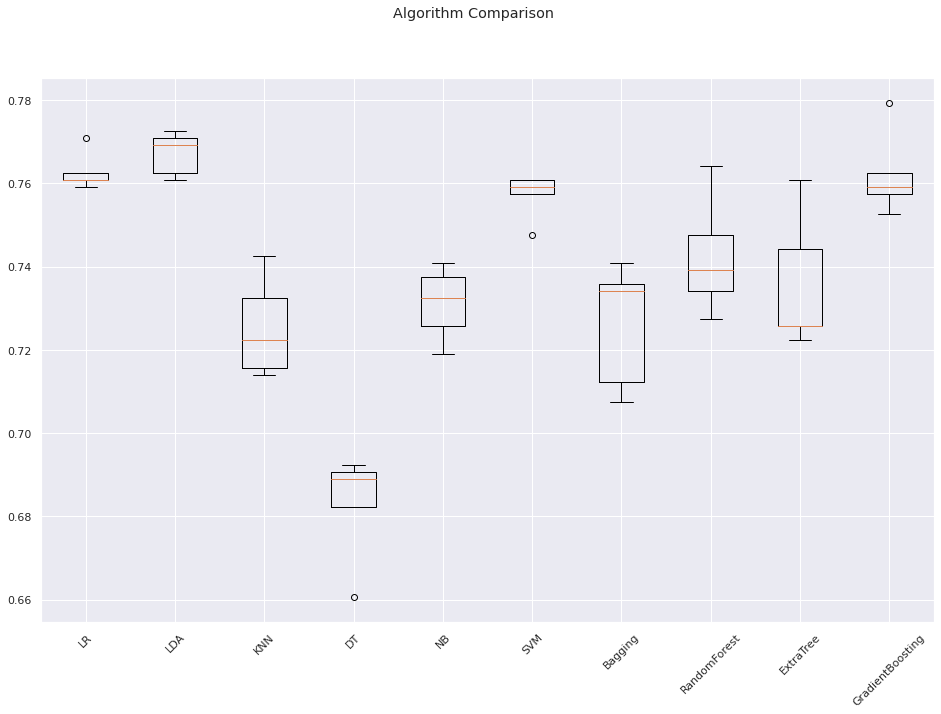

In [242]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation=45)
pyplot.show()

In [243]:
# Make predictions on validation dataset
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7820855614973262
[[286  88]
 [ 75 299]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       374
           1       0.77      0.80      0.79       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



# Hyperparameter tuning for LR and LDA

In [0]:
# Hyperpartemer tuning for Logistics Regression and LDA with Grid Search

grid_params_LDA = [{'solver':['svd','lsqr','eigen'], 'tol':[0.0001,0.0002,0.0003]}]

grid_params_LR = [{'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']}]

gs_LDA = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=grid_params_LDA, scoring='recall', cv=10)

gs_LR = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_params_LR, scoring='recall', cv=10)

grids = [gs_LR,gs_LDA]
grid_dict = {0:'LogisticRegression',1:'LinearDiscriminantAnalysis'}

In [245]:
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	gs.fit(X_train, y_train)
	print('Best params: %s' % gs.best_params_)
	print('Best training accuracy: %.3f' % gs.best_score_)
	y_pred = gs.predict(X_test)
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Estimator: LogisticRegression
Best params: {'penalty': 'none', 'solver': 'newton-cg'}
Best training accuracy: 0.812
Test set accuracy score for best params: 0.774 

Estimator: LinearDiscriminantAnalysis
Best params: {'solver': 'svd', 'tol': 0.0003}
Best training accuracy: 0.810
Test set accuracy score for best params: 0.773 

Classifier with best test set accuracy: LogisticRegression


In [246]:
# Make predictions on validation dataset
LR = gs.best_estimator_
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7727272727272727
[[269 105]
 [ 65 309]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       374
           1       0.75      0.83      0.78       374

    accuracy                           0.77       748
   macro avg       0.78      0.77      0.77       748
weighted avg       0.78      0.77      0.77       748



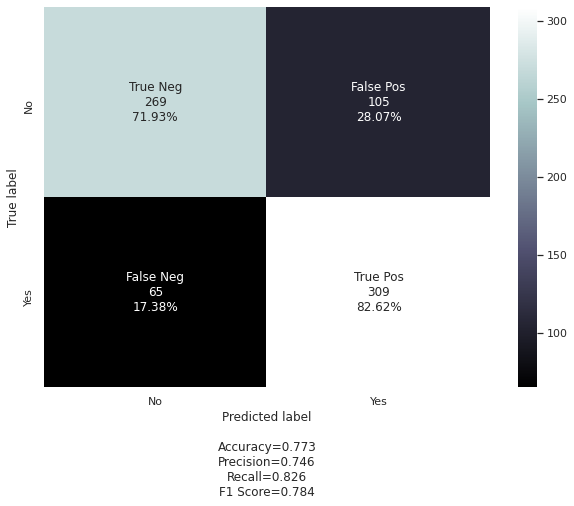

In [247]:
#Plot confusion Matrix for LR
cm = confusion_matrix(y_test,predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']


# import one function: make_confusion_matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if  len(group_names) ==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent: 
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf[1])]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(10,7))
    sns.heatmap(cf,annot=box_labels,fmt="",cmap="bone",cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


make_confusion_matrix(cm, 
                      group_names=group_names,
                      categories=categories, 
                      cmap='binary')

plt.savefig('/content/drive/Shared drives/Data Science with Python Project Team 4/Plots/boxplot.png')

#Permutation Feature Importance for LR

In [248]:
#Ziru Feature Importance for LR

from sklearn.inspection import permutation_importance

results = permutation_importance(LR,X_train, y_train, scoring='neg_root_mean_squared_error')

plt.figure(figsize=(100,300))

#get importance
importance = results.importances_mean
sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance[sorted_idx],height=0.4,align='center')

plt.yticks(pos, X_train.columns[sorted_idx],fontsize=100)
plt.xlabel('Permutation Feature Importance Scores', fontsize=100)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Logistic Regression', fontsize=200)

plt.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Refine the LR model 

In [0]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [250]:
X_train.columns[np.argsort(importance)[-20:]]

Index(['8', '31', '7', '21', 'TotalCharges', '3', '27', '26', '25', '10', '18',
       '12', '24', '17', '6', '5', 'tenure*monthlycharges', 'MonthlyCharges',
       '2', '16'],
      dtype='object')

In [0]:
X_train_new1 = X_train[['8', '31', '7', '21', 'TotalCharges', '3', '27', '26', '25', '10', '18',
       '12', '24', '17', '6', '5', 'tenure*monthlycharges', 'MonthlyCharges',
       '2', '16']]

In [0]:
X_test_new1 = X_test[['8', '31', '7', '21', 'TotalCharges', '3', '27', '26', '25', '10', '18',
       '12', '24', '17', '6', '5', 'tenure*monthlycharges', 'MonthlyCharges',
       '2', '16']]

In [253]:
# Make predictions on validation dataset
LR = gs.best_estimator_
LR.fit(X_train_new1, y_train)
predictions = LR.predict(X_test_new1)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7366310160427807
[[272 102]
 [ 95 279]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       374
           1       0.73      0.75      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



In [254]:
X_train.columns[np.argsort(importance)[:30]]

Index(['PaperBilling', 'NotOptedMovies', 'OptedforOnlineBackup',
       'OptedforDevicePro', 'No_ML', 'NotOptedforOnlineSec', 'One year',
       'HasML', 'Electronic check', 'NotOptedTV', 'Bank transfer(auto)',
       'notOPtedforTechSupport', 'Mailed check', 'TotalCharges_log',
       'IsSeniorCitizen', 'Not_A_SeniorCitizen', 'OptedMovies', '1', 'tenure',
       'NoPhoneService', 'Has_PhoneService', 'No_PhoneService', 'OPtedTV',
       'OptedforOnlineSec', 'Credit Card(auto)', 'NotApplcable',
       'NotApplicable(NoInternet)', 'NotApplicable(NoInternet)',
       'NotApplicable(noInternet)', 'NoInternet'],
      dtype='object')

In [0]:
X_train_new2 = X_train.drop(['PaperBilling', 'NotOptedMovies', 'OptedforOnlineBackup',
       'OptedforDevicePro', 'No_ML', 'NotOptedforOnlineSec', 'One year',
       'HasML', 'Electronic check', 'NotOptedTV', 'Bank transfer(auto)',
       'notOPtedforTechSupport', 'Mailed check', 'TotalCharges_log',
       'IsSeniorCitizen', 'Not_A_SeniorCitizen', 'OptedMovies', '1', 'tenure',
       'NoPhoneService', 'Has_PhoneService', 'No_PhoneService', 'OPtedTV',
       'OptedforOnlineSec', 'Credit Card(auto)', 'NotApplcable',
       'NotApplicable(NoInternet)', 'NotApplicable(NoInternet)',
       'NotApplicable(noInternet)', 'NoInternet'],axis=1,inplace=False)

In [0]:
X_test_new2 =X_test.drop(['PaperBilling', 'NotOptedMovies', 'OptedforOnlineBackup',
       'OptedforDevicePro', 'No_ML', 'NotOptedforOnlineSec', 'One year',
       'HasML', 'Electronic check', 'NotOptedTV', 'Bank transfer(auto)',
       'notOPtedforTechSupport', 'Mailed check', 'TotalCharges_log',
       'IsSeniorCitizen', 'Not_A_SeniorCitizen', 'OptedMovies', '1', 'tenure',
       'NoPhoneService', 'Has_PhoneService', 'No_PhoneService', 'OPtedTV',
       'OptedforOnlineSec', 'Credit Card(auto)', 'NotApplcable',
       'NotApplicable(NoInternet)', 'NotApplicable(NoInternet)',
       'NotApplicable(noInternet)', 'NoInternet'],axis=1,inplace=False)

In [257]:
# Make predictions on validation dataset
LR = gs.best_estimator_
LR.fit(X_train_new2, y_train)
predictions = LR.predict(X_test_new2)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7754010695187166
[[269 105]
 [ 63 311]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       374
           1       0.75      0.83      0.79       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.77       748
weighted avg       0.78      0.78      0.77       748



# Modeling: Neural Network

In [0]:
# Neural Network

# Fit a Neural Network with early stopping
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=50, 
                   verbose=1)
# this simply sets up the model, 
model = Sequential()
model.add(layers.Dense(40, activation='relu',
input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation = 'sigmoid')) 
#model.add(layers.Dense(1), activation='') # the activation function here is 'linear' by default

In [259]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
          validation_data=(X_test,y_test),
          epochs=51, batch_size=10, callbacks=[es],
          verbose=1)
# 0 = dont show verbose, 1 = show it!

Epoch 1/51
299/299 [==============================] - 1s 2ms/step - loss: 0.5794 - accuracy: 0.6983 - val_loss: 0.5235 - val_accuracy: 0.7286
Epoch 2/51
299/299 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.7532 - val_loss: 0.4879 - val_accuracy: 0.7741
Epoch 3/51
299/299 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.7682 - val_loss: 0.4951 - val_accuracy: 0.7473
Epoch 4/51
299/299 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7602 - val_loss: 0.4828 - val_accuracy: 0.7701
Epoch 5/51
299/299 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.7662 - val_loss: 0.4810 - val_accuracy: 0.7594
Epoch 6/51
299/299 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7669 - val_loss: 0.4883 - val_accuracy: 0.7821
Epoch 7/51
299/299 [==============================] - 1s 2ms/step - loss: 0.4761 - accuracy: 0.7669 - val_loss: 0.4893 - val_accuracy: 0.7794
Epoch 

In [260]:
#Confusion Matrix for NN (training data)
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_train = (predictions_train>0.5) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predictions_train)
print(cm)
print(classification_report(y_train, predictions_train))

94/94 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8294
[[1220  275]
 [ 162 1333]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1495
           1       0.83      0.89      0.86      1495

    accuracy                           0.85      2990
   macro avg       0.86      0.85      0.85      2990
weighted avg       0.86      0.85      0.85      2990



In [261]:
#Confusion Matrix for NN (test data)

#model.fit(X_train, y_train_NN)
predictions_test = model.predict(X_test)
predictions_test = (predictions_test>0.5) 

from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(y_test, predictions_test)
print(cm_nn)
print(classification_report(y_test, predictions_test))

[[269 105]
 [ 79 295]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       374
           1       0.74      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



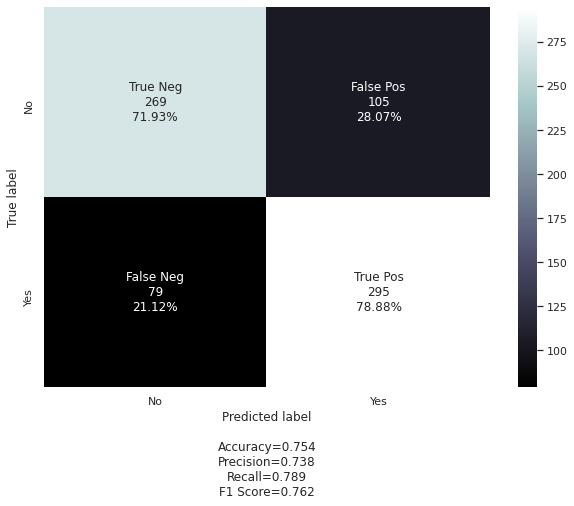

In [262]:
# Plot Confusion Matrix for NN
make_confusion_matrix(cm_nn, 
                      group_names=group_names,
                      categories=categories, 
                      cmap='bone')

# Permutation Feature Importance for NN



In [264]:
#Feature Importance for NN

from sklearn.inspection import permutation_importance

results = permutation_importance(model,X_train, y_train, scoring='neg_root_mean_squared_error')

plt.figure(figsize=(200,500))

#get importance
importance_nn = results.importances_mean
sorted_idx = np.argsort(importance_nn)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance_nn[sorted_idx],align='center')


plt.yticks(pos, X_train.columns[sorted_idx],fontsize=100)
plt.xlabel('Permutation Feature Importance Scores', fontsize=100)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Neural Network', fontsize=200)


plt.tight_layout()

plt.show()


Output hidden; open in https://colab.research.google.com to view.